# Exploratory Data Analysis

In [1]:
import pandas as pd

meteo_df = pd.read_csv("../data/ogd-smn_puy_h_recent.csv", sep=";")
metadata_df = pd.read_csv("../data/ogd-smn_meta_parameters.csv", encoding='ISO-8859-1', sep=";", on_bad_lines='skip')
metadata_df = metadata_df.set_index("parameter_shortname")

In [2]:
meteo_df

,station_abbr,reference_timestamp,tre200h0,tre200hn,tre200hx,tre005h0,tre005hn,ure200h0,pva200h0,tde200h0,...,fve010h0,rre150h0,htoauths,gre000h0,oli000h0,olo000h0,osr000h0,ods000h0,sre000h0,erefaoh0
0,PUY,01.01.2025 00:00,0.9,0.1,1.2,NaN,NaN,98.1,6.4,0.6,...,NaN,0.0,NaN,1,NaN,NaN,NaN,0,0,-0.004
1,PUY,01.01.2025 01:00,0.4,0.2,0.5,NaN,NaN,93.6,5.9,-0.6,...,NaN,0.0,NaN,1,NaN,NaN,NaN,0,0,-0.002
2,PUY,01.01.2025 02:00,0.5,0.2,0.8,NaN,NaN,95.3,6.0,-0.1,...,NaN,0.0,NaN,1,NaN,NaN,NaN,0,0,-0.003
3,PUY,01.01.2025 03:00,0.8,0.5,0.9,NaN,NaN,98.2,6.3,0.5,...,NaN,0.0,NaN,1,NaN,NaN,NaN,0,0,-0.003
4,PUY,01.01.2025 04:00,0.6,0.4,0.7,NaN,NaN,89.2,5.7,-1.0,...,NaN,0.0,NaN,1,NaN,NaN,NaN,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,PUY,17.10.2025 19:00,9.6,9.4,9.6,NaN,NaN,76.3,9.1,5.6,...,NaN,0.0,NaN,1,NaN,NaN,NaN,0,0,0.013
6956,PUY,17.10.2025 20:00,9.3,9.2,9.4,NaN,NaN,77.8,9.1,5.6,...,NaN,0.0,NaN,1,NaN,NaN,NaN,0,0,0.013
6957,PUY,17.10.2025 21:00,9.7,9.4,9.8,NaN,NaN,75.4,9.1,5.6,...,NaN,0.0,NaN,1,NaN,NaN,NaN,0,0,0.013
6958,PUY,17.10.2025 22:00,9.4,9.4,9.5,NaN,NaN,76.6,9.0,5.5,...,NaN,0.0,NaN,1,NaN,NaN,NaN,0,0,0.014


### Rename columns abbreviation to parameter description 

In [3]:
meteo_df = meteo_df.rename({
    col: metadata_df.loc[col]["parameter_description_en"]
    for col in
    meteo_df.columns
    if col in metadata_df.index
}, axis=1)

In [4]:
meteo_df['reference_timestamp'] = pd.to_datetime(meteo_df['reference_timestamp'], dayfirst=True)

In [5]:
meteo_df.isnull()

,station_abbr,reference_timestamp,Air temperature 2 m above ground; hourly mean,Air temperature 2 m above ground; hourly minimum,Air temperature 2 m above ground; hourly maximum,Air temperature at 5 cm above grass; hourly mean,Air temperature at 5 cm above grass; hourly minimum,Relative air humidity 2 m above ground; hourly mean,Vapour pressure 2 m above ground; hourly mean,Dew point 2 m above ground; hourly mean,...,Wind speed vectorial; hourly mean in m/s,Precipitation; hourly total,Snow depth (automatic measurement); hourly current value,Global radiation; hourly mean,Longwave incoming radiation; hourly mean,Longwave outgoing radiation; hourly mean,Shortwave reflected radiation; hourly mean,Diffuse radiation; hourly mean,Sunshine duration; hourly total,Reference evaporation from FAO; hourly total
0,False,False,False,False,False,True,True,False,False,False,...,True,False,True,False,True,True,True,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,True,False,True,False,True,True,True,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,True,False,True,False,True,True,True,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,True,False,True,False,True,True,True,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,True,False,True,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,False,False,False,False,False,True,True,False,False,False,...,True,False,True,False,True,True,True,False,False,False
6956,False,False,False,False,False,True,True,False,False,False,...,True,False,True,False,True,True,True,False,False,False
6957,False,False,False,False,False,True,True,False,False,False,...,True,False,True,False,True,True,True,False,False,False
6958,False,False,False,False,False,True,True,False,False,False,...,True,False,True,False,True,True,True,False,False,False


## Plot available data

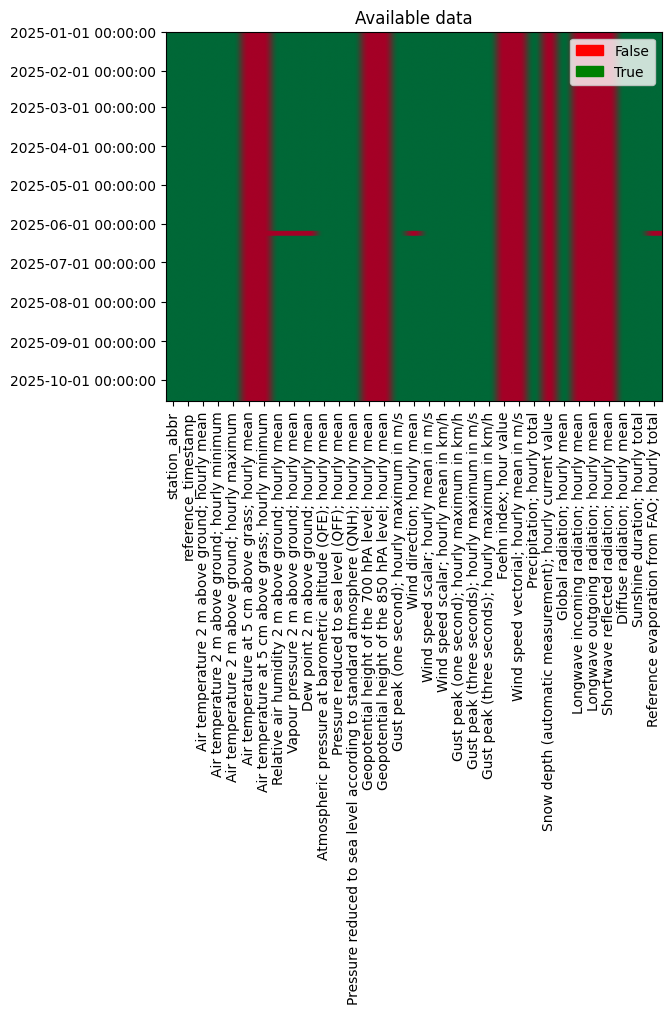

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

unique_months = meteo_df.groupby(by=meteo_df.reference_timestamp.dt.month).head(1)

plt.title("Available data")
im = plt.imshow(~meteo_df.isnull(), cmap='RdYlGn', aspect='auto')
plt.xticks(np.arange(len(meteo_df.columns)), meteo_df.columns, rotation=90)
plt.yticks(unique_months.index, unique_months.reference_timestamp)

red_patch = mpatches.Patch(color='red', label='False')
green_patch = mpatches.Patch(color='green', label='True')
plt.legend(handles=[red_patch, green_patch], loc='upper right')

plt.show()


## Remove columns without any data

In [7]:
meteo_df = meteo_df.dropna(axis=1, how='all')

## Distributions

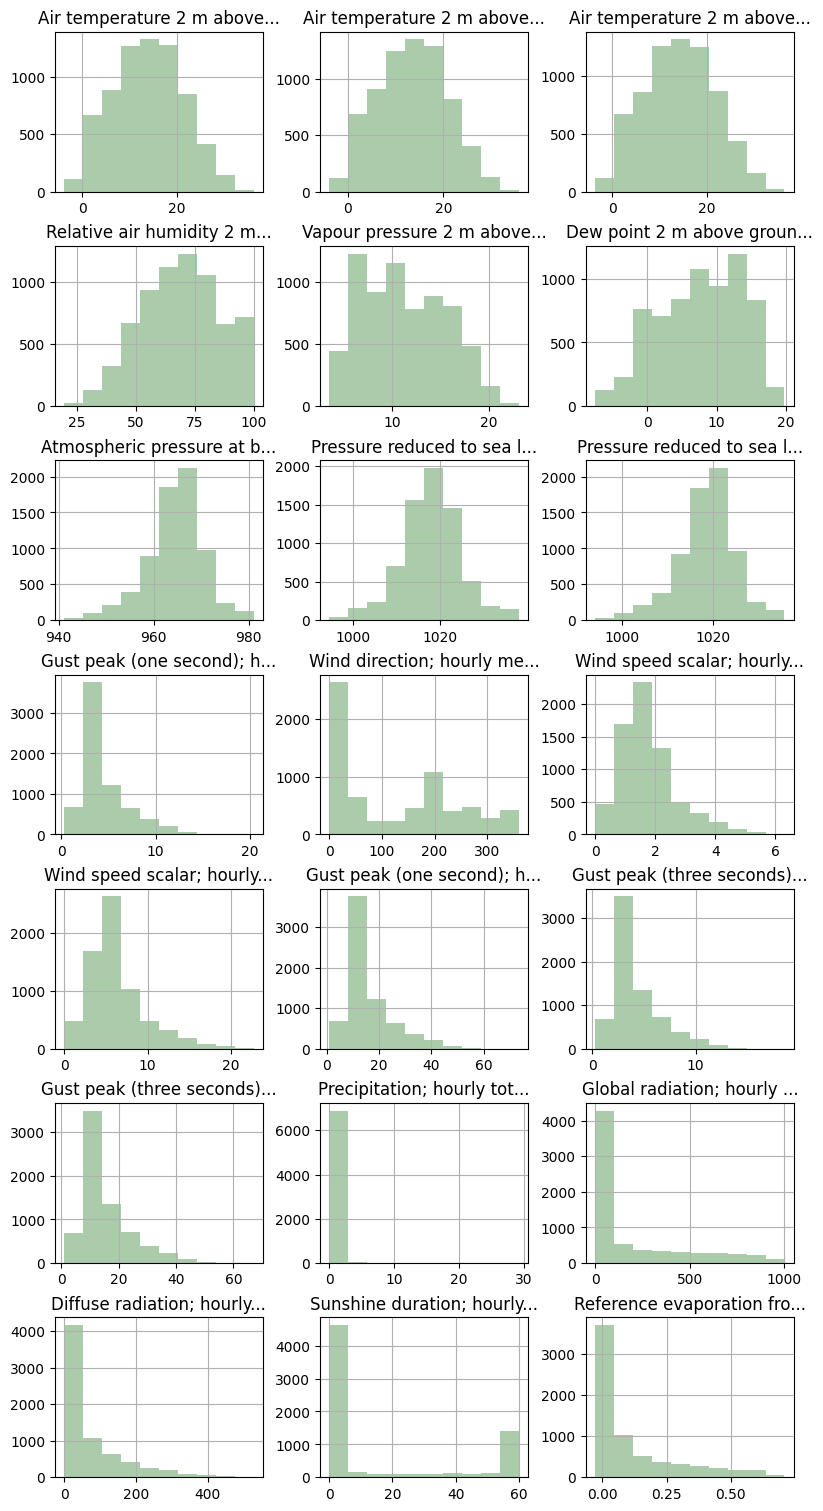

In [8]:
fig, axs = plt.subplots(7, 3, layout='constrained', figsize=(8, 15))
axs = axs.flatten()

for idx, feature in enumerate(meteo_df.drop(['station_abbr', 'reference_timestamp'], axis=1).columns):
    axs[idx].set_title(feature[:25] + "...")
    meteo_df[feature].hist(ax=axs[idx], color='#aca')

## Evolution through time

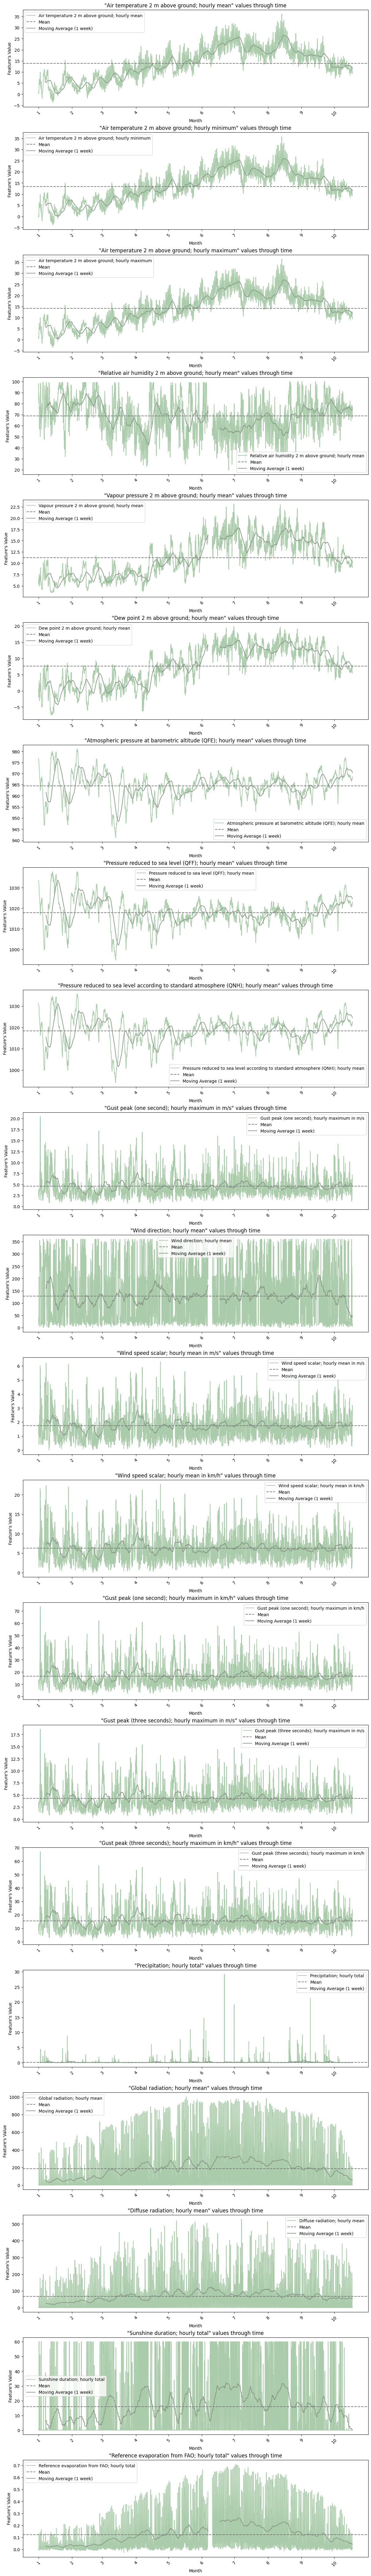

In [9]:
fig, axs = plt.subplots(21, 1, figsize=(12, 4*21), layout='constrained')
axs = axs.flatten()

rolling_mean_size = 24*7

for idx, feature in enumerate(meteo_df.drop(['station_abbr', 'reference_timestamp'], axis=1).columns):
    axs[idx].set_title(f'\"{feature}\" values through time')
    meteo_df[feature].plot(color='#aca', ax=axs[idx])
    axs[idx].axhline(meteo_df[feature].mean(), linestyle='--', color='#777', label='Mean')
    axs[idx].set_xticks(unique_months.index, unique_months.reference_timestamp.dt.month, rotation=45)
    axs[idx].set_xlabel('Month')
    axs[idx].set_ylabel("Feature's Value")
    axs[idx].plot(meteo_df[feature].rolling(window=rolling_mean_size).mean(), color='#898', label='Moving Average (1 week)')
    axs[idx].legend()

# Prepare dataset

### Select features

In [10]:
target_column = 'Air temperature 2 m above ground; hourly mean'
feature_columns = meteo_df.drop(['station_abbr'], axis=1).columns
features_df = meteo_df[feature_columns]

#### Feature correlations

In [11]:
for feat, feature_row in features_df.corr().abs().iterrows():
    print(feat)
    print("-"*50)
    print(feature_row.sort_values(ascending=False)[1:6])
    print()

reference_timestamp
--------------------------------------------------
Dew point 2 m above ground; hourly mean             0.712901
Vapour pressure 2 m above ground; hourly mean       0.681306
Air temperature 2 m above ground; hourly minimum    0.665443
Air temperature 2 m above ground; hourly mean       0.661228
Air temperature 2 m above ground; hourly maximum    0.656775
Name: reference_timestamp, dtype: float64

Air temperature 2 m above ground; hourly mean
--------------------------------------------------
Air temperature 2 m above ground; hourly minimum    0.999360
Air temperature 2 m above ground; hourly maximum    0.999346
Dew point 2 m above ground; hourly mean             0.831840
Vapour pressure 2 m above ground; hourly mean       0.825949
reference_timestamp                                 0.661228
Name: Air temperature 2 m above ground; hourly mean, dtype: float64

Air temperature 2 m above ground; hourly minimum
--------------------------------------------------
Air temper

#### Remove highly similar features

In [12]:
features_df = features_df.drop([
    'Air temperature 2 m above ground; hourly minimum',
    'Air temperature 2 m above ground; hourly maximum',
    'Dew point 2 m above ground; hourly mean',
    'Pressure reduced to sea level according to standard atmosphere (QNH); hourly mean',
    'Pressure reduced to sea level (QFF); hourly mean',
    'Gust peak (one second); hourly maximum in m/s',
    'Gust peak (one second); hourly maximum in km/h',
    'Gust peak (three seconds); hourly maximum in m/s',
    'Gust peak (three seconds); hourly maximum in km/h',
    'Wind speed scalar; hourly mean in km/h',
    'Reference evaporation from FAO; hourly total',
    'Sunshine duration; hourly total',
], axis=1)

### Rename features 

In [13]:
features_df = features_df.rename({
    "Air temperature 2 m above ground; hourly mean": "air_temperature",
    "Relative air humidity 2 m above ground; hourly mean": "air_humidity",
    "Vapour pressure 2 m above ground; hourly mean": "vapour_pressure",
    "Atmospheric pressure at barometric altitude (QFE); hourly mean": "atmospheric_pressure",
    "Wind direction; hourly mean": "wind_direction",
    "Wind speed scalar; hourly mean in m/s": "wind_speed",
    "Precipitation; hourly total": "precipitation",
    "Global radiation; hourly mean": "global_radiation",
    "Diffuse radiation; hourly mean": "diffuse_radiation"
}, axis=1)

feature_columns = features_df.columns

### Preprocess features

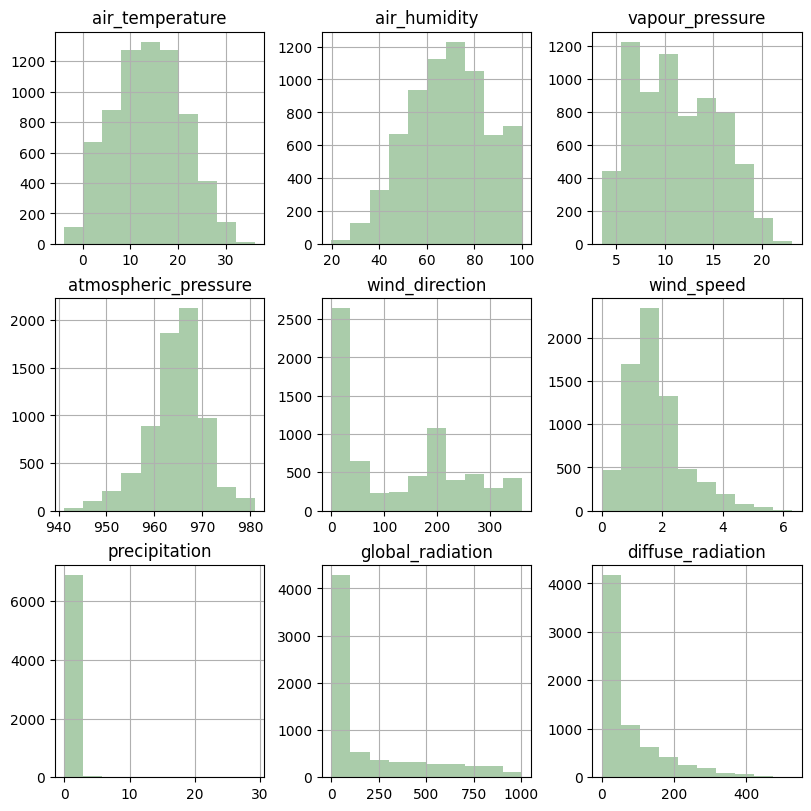

In [14]:
fig, axs = plt.subplots(3, 3, layout='constrained', figsize=(8, 8))
axs = axs.flatten()

for idx, feature in enumerate(features_df.drop(['reference_timestamp'], axis=1).columns):
    axs[idx].set_title(feature)
    features_df[feature].hist(ax=axs[idx], color='#aca')

In [15]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

features_df['hour'] = meteo_df["reference_timestamp"].dt.hour
features_df['day'] = meteo_df["reference_timestamp"].dt.day
features_df['month'] = meteo_df["reference_timestamp"].dt.month
features_df = features_df.drop("reference_timestamp", axis=1)

column_transformer = ColumnTransformer(
    transformers=[
        ("wind_direction_sin", sin_transformer(360), ["wind_direction"]),
        ("wind_direction_cos", cos_transformer(360), ["wind_direction"]),
        ("day_sin", sin_transformer(24), ["hour"]),
        ("day_cos", cos_transformer(24), ["hour"]),
        ("month_sin", sin_transformer(30), ["day"]),
        ("month_cos", cos_transformer(30), ["day"]),
        ("year_sin", sin_transformer(12), ["month"]),
        ("year_cos", cos_transformer(12), ["month"]),
        ("precipitation", PowerTransformer(), ["precipitation"]),
        ("global_radiation", PowerTransformer(), ["global_radiation"]),
        ("diffuse_radiation", PowerTransformer(), ["diffuse_radiation"]),
    ],
    remainder=StandardScaler(),
)

column_transformer.set_output(transform="pandas")

,transformers,"[('wind_direction_sin', ...), ('wind_direction_cos', ...), ...]"
,remainder,StandardScaler()
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,func,<function sin...t 0x1209ce8e0>
,inverse_func,None
,validate,False


In [16]:
features_df = column_transformer.fit_transform(features_df)

def transform_column_name(col):
    splitted = col.split("__")
    col = splitted[1]
    
    if "sin" in splitted[0]:
        col += f"_sin"
    elif "cos" in splitted[0]:
        col += f"_cos"

    return col

# Fix columns names
features_df = features_df.rename({col: transform_column_name(col) for col in features_df.columns}, axis=1)
features_df

,wind_direction_sin,wind_direction_cos,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,precipitation,global_radiation,diffuse_radiation,air_temperature,air_humidity,vapour_pressure,atmospheric_pressure,wind_speed
0,0.190809,0.981627,0.000000,1.000000,0.207912,0.978148,0.500000,0.866025,-0.338714,-1.028268,-1.158624,-1.766208,1.748369,-1.133515,2.051235,-0.694811
1,0.453990,0.891007,0.258819,0.965926,0.207912,0.978148,0.500000,0.866025,-0.338714,-1.028268,-1.158624,-1.834643,1.477741,-1.251306,1.984697,-0.162494
2,0.390731,0.920505,0.500000,0.866025,0.207912,0.978148,0.500000,0.866025,-0.338714,-1.028268,-1.158624,-1.820956,1.579978,-1.227748,1.984697,-0.162494
3,0.406737,0.913545,0.707107,0.707107,0.207912,0.978148,0.500000,0.866025,-0.338714,-1.028268,-1.158624,-1.779895,1.754383,-1.157073,1.951429,0.050432
4,0.469472,0.882948,0.866025,0.500000,0.207912,0.978148,0.500000,0.866025,-0.338714,-1.028268,-1.158624,-1.807269,1.213126,-1.298423,1.884891,-0.056031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,0.224951,0.974370,-0.965926,0.258819,-0.406737,-0.913545,-0.866025,0.500000,-0.338714,-1.028268,-1.158624,-0.575437,0.437326,-0.497441,0.554145,1.115066
6956,0.173648,0.984808,-0.866025,0.500000,-0.406737,-0.913545,-0.866025,0.500000,-0.338714,-1.028268,-1.158624,-0.616498,0.527535,-0.497441,0.604048,1.327993
6957,0.258819,0.965926,-0.707107,0.707107,-0.406737,-0.913545,-0.866025,0.500000,-0.338714,-1.028268,-1.158624,-0.561750,0.383200,-0.497441,0.653951,0.795676
6958,0.121869,0.992546,-0.500000,0.866025,-0.406737,-0.913545,-0.866025,0.500000,-0.338714,-1.028268,-1.158624,-0.602811,0.455367,-0.520999,0.687220,1.540920


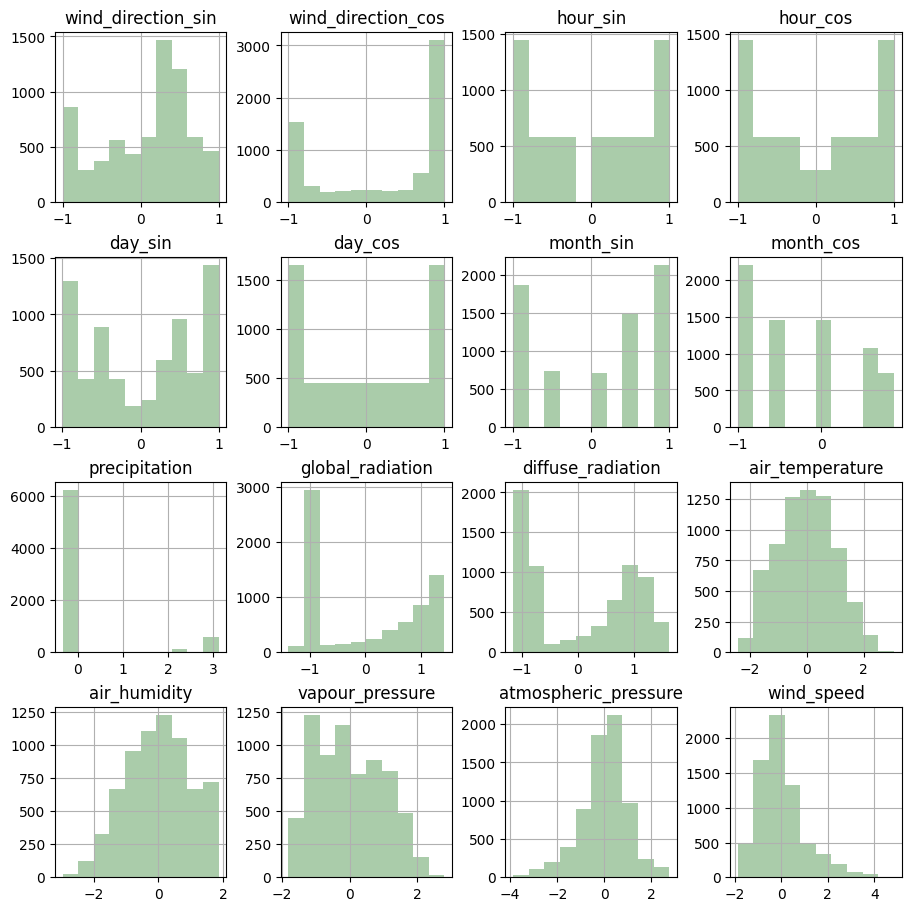

In [17]:
fig, axs = plt.subplots(4, 4, layout='constrained', figsize=(9, 9))
axs = axs.flatten()

for idx, feature in enumerate(features_df.columns):
    axs[idx].set_title(feature)
    features_df[feature].hist(ax=axs[idx], color='#aca')

### Impute missing values

In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
features_df.loc[:] = imputer.fit_transform(features_df)

### All features should be the in the past

In [19]:
feature_columns = features_df.columns

meteo_df = pd.concat([
    meteo_df[['reference_timestamp', target_column]].rename({target_column: 'air_temperature'}, axis=1),
    features_df.shift(24).rename({col: col + " (lag 24)" for col in feature_columns}, axis=1),
], axis=1)

meteo_df = meteo_df.dropna(axis=0)
meteo_df

,reference_timestamp,air_temperature,wind_direction_sin (lag 24),wind_direction_cos (lag 24),hour_sin (lag 24),hour_cos (lag 24),day_sin (lag 24),day_cos (lag 24),month_sin (lag 24),month_cos (lag 24),precipitation (lag 24),global_radiation (lag 24),diffuse_radiation (lag 24),air_temperature (lag 24),air_humidity (lag 24),vapour_pressure (lag 24),atmospheric_pressure (lag 24),wind_speed (lag 24)
24,2025-01-02 00:00:00,4.6,0.190809,0.981627,0.000000,1.000000,0.207912,0.978148,0.500000,0.866025,-0.338714,-1.028268,-1.158624,-1.766208,1.748369,-1.133515,2.051235,-0.694811
25,2025-01-02 01:00:00,4.9,0.453990,0.891007,0.258819,0.965926,0.207912,0.978148,0.500000,0.866025,-0.338714,-1.028268,-1.158624,-1.834643,1.477741,-1.251306,1.984697,-0.162494
26,2025-01-02 02:00:00,4.2,0.390731,0.920505,0.500000,0.866025,0.207912,0.978148,0.500000,0.866025,-0.338714,-1.028268,-1.158624,-1.820956,1.579978,-1.227748,1.984697,-0.162494
27,2025-01-02 03:00:00,4.7,0.406737,0.913545,0.707107,0.707107,0.207912,0.978148,0.500000,0.866025,-0.338714,-1.028268,-1.158624,-1.779895,1.754383,-1.157073,1.951429,0.050432
28,2025-01-02 04:00:00,5.0,0.469472,0.882948,0.866025,0.500000,0.207912,0.978148,0.500000,0.866025,-0.338714,-1.028268,-1.158624,-1.807269,1.213126,-1.298423,1.884891,-0.056031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,2025-10-17 19:00:00,9.6,0.156434,0.987688,-0.965926,0.258819,-0.207912,-0.978148,-0.866025,0.500000,-0.338714,-1.028268,-1.158624,-0.288009,0.142642,-0.332533,0.487608,-0.375421
6956,2025-10-17 20:00:00,9.3,0.258819,0.965926,-0.866025,0.500000,-0.207912,-0.978148,-0.866025,0.500000,-0.338714,-1.028268,-0.826868,-0.397506,0.311032,-0.379649,0.504242,-0.056031
6957,2025-10-17 21:00:00,9.7,0.224951,0.974370,-0.707107,0.707107,-0.207912,-0.978148,-0.866025,0.500000,-0.338714,-1.028268,-0.826868,-0.575437,0.485437,-0.450324,0.504242,1.115066
6958,2025-10-17 22:00:00,9.4,0.207912,0.978148,-0.500000,0.866025,-0.207912,-0.978148,-0.866025,0.500000,-0.338714,-1.028268,-1.158624,-0.534376,0.467395,-0.426766,0.487608,0.795676


### Cross-Validation

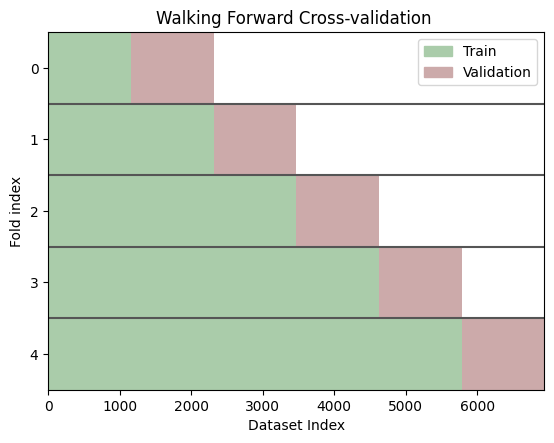

In [20]:
from sklearn.model_selection import TimeSeriesSplit
from matplotlib.colors import ListedColormap

# Walking Forward Cross-validation 
n_folds = 5
chosen_data = np.zeros((n_folds, len(meteo_df)))
tscv = TimeSeriesSplit(n_splits=n_folds)

for fold_idx, (train_indices, val_indices) in enumerate(tscv.split(meteo_df)):
    chosen_data[fold_idx, train_indices] = 1
    chosen_data[fold_idx, val_indices] = 2

cmap = ListedColormap(["#fff", "#aca", "#caa"])

train_patch = mpatches.Patch(color="#aca", label='Train')
val_patch = mpatches.Patch(color="#caa", label='Validation')
plt.legend(handles=[train_patch, val_patch], loc='upper right')
plt.imshow(chosen_data, cmap=cmap, aspect=1000, vmin=0, vmax=2, interpolation='None')
plt.title("Walking Forward Cross-validation ")
plt.xlabel('Dataset Index')
plt.ylabel('Fold index')
plt.axhline(0.5, color='#555')
plt.axhline(1.5, color='#555')
plt.axhline(2.5, color='#555')
plt.axhline(3.5, color='#555')

## Train Model

In [21]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import root_mean_squared_error

fold_performances = []

for fold_idx, (train_indices, val_indices) in enumerate(tscv.split(meteo_df)):
    train_df = meteo_df.iloc[train_indices]
    val_df = meteo_df.iloc[val_indices]

    train_features = train_df.drop(["reference_timestamp", "air_temperature"], axis=1)
    val_features = val_df.drop(["reference_timestamp", "air_temperature"], axis=1)

    train_target = train_df['air_temperature']
    val_target = val_df['air_temperature']

    # Dummy regressor (predict the mean value everytime)
    regressor = DummyRegressor(strategy="mean").fit(train_features, train_target)
    val_pred = regressor.predict(val_features)

    # Compute performances 
    pred_mse = root_mean_squared_error(val_target, val_pred)
    fold_performances.append(pred_mse)

Text(0, 0.5, 'Root Mean Square Error (RMSE)')

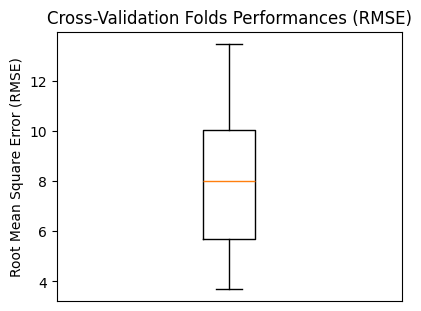

In [22]:
plt.figure(figsize=(4, 3), layout="constrained")
plt.title("Cross-Validation Folds Performances (RMSE)")
plt.boxplot(fold_performances)
plt.xticks([])
plt.ylabel("Root Mean Square Error (RMSE)")

In [23]:
print("Cross-validation mean folds rmse:", np.mean(fold_performances))

Cross-validation mean folds rmse: 8.184034703444398
